In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib
import visualise as v
import functions as f
import algorythm as alg
import math
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [252]:
df = pd.read_csv(r'./dataset/generated.csv', header=0, sep=',')
del df[df.columns[0]]

In [253]:
x = df[:100000]
x_val = df[100000:120000]

In [254]:
x_train,y_train = f.create_data(x, 4)
x_val, y_val = f.create_data(x_val, 4)

new
new


In [255]:
inputs = keras.Input(shape=(4,))

In [256]:
dense_1 = layers.Dense(16)(inputs)

In [257]:
LR = tf.keras.activations.tanh(dense_1)

In [258]:
outputs = layers.Dense(1, activation = "sigmoid")(LR)

In [259]:
model = keras.Model(inputs=inputs, outputs=outputs, name="thermal-model")

In [260]:
model.summary()

Model: "thermal-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_48 (Dense)            (None, 16)                80        
                                                                 
 tf.math.tanh_2 (TFOpLambda)  (None, 16)               0         
                                                                 
 dense_49 (Dense)            (None, 1)                 17        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [261]:
model.compile(loss = "binary_crossentropy", optimizer = 'RMSprop', metrics = 'accuracy')

In [262]:

model.save_weights('initial')

In [263]:
model.load_weights('initial')
model.fit(x = x_train, y = y_train, verbose = 1, validation_data = (x_val, y_val))

3125/3125 [==============================] - 5s 2ms/step - loss: 0.5172 - accuracy: 0.7844 - val_loss: 0.5046 - val_accuracy: 0.7969


In [264]:
prediction = model.predict(x_val)
prediction

array([[0.20481405],
       [0.20481405],
       [0.20481405],
       ...,
       [0.20481405],
       [0.20481405],
       [0.20481405]], dtype=float32)

In [246]:
test = pd.DataFrame({'x': x_val[:,0], 'y' : y_val, 'pred': prediction[:,0]})
test

,x,y,pred
0,2534.869561,0,0.211861
1,2529.272505,0,0.211861
2,2461.308097,0,0.211861
3,2515.320278,0,0.211861
4,2523.187687,0,0.211861
...,...,...,...
19944,2661.524665,1,0.211861
19945,2629.486781,1,0.211861
19946,2592.551586,0,0.211861
19947,2625.229948,0,0.211861


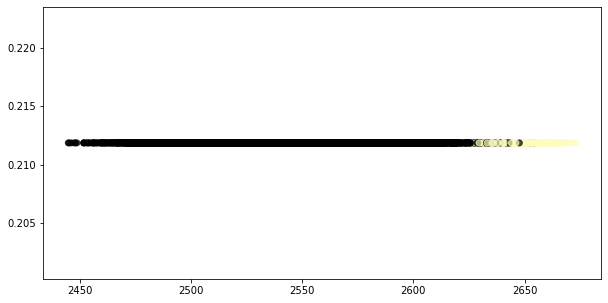

In [247]:
fig = plt.figure(figsize=(10, 5))
plot = fig.add_subplot(111)
plot.scatter(x_val[:,0], prediction[:,0], c= y_val, alpha=0.7, cmap="magma")

In [265]:
model.weights

[<tf.Variable 'dense_48/kernel:0' shape=(4, 16) dtype=float32, numpy=
 array([[-0.3441342 ,  0.0482555 , -0.25196704, -0.5126826 , -0.38139662,
          0.5440624 , -0.2718962 ,  0.3301667 ,  0.07953967, -0.21209508,
         -0.36698645,  0.5269617 ,  0.0055061 , -0.33236253, -0.1426963 ,
          0.48063362],
        [-0.0968734 ,  0.15027708,  0.26248437,  0.4957646 , -0.06503311,
          0.4785912 , -0.2863351 , -0.52659917,  0.43255728, -0.10256597,
         -0.14931658, -0.31844443,  0.19554394, -0.13896349,  0.02640763,
         -0.36208642],
        [ 0.49502003, -0.52378124, -0.30504277,  0.4810629 ,  0.06294268,
          0.29766566, -0.24195126,  0.05264741, -0.18446864,  0.14486396,
          0.19141114,  0.03631723,  0.32827097,  0.03937626, -0.15148513,
         -0.02003837],
        [-0.4010692 ,  0.04242128, -0.30776554, -0.37117633,  0.44389004,
          0.04384452, -0.13312754,  0.03174734, -0.35223788, -0.25043225,
         -0.41404617, -0.51061517,  0.45217818,